# A Novel Active Queue Management Scheme for Programmable Data Planes using P4

## Abstract
For supporting different applications requirments the network programmability brings flexibility, agility and rapid introduction of new capabilities. Siginificant benefits like Quality of Service QoS can be acheived by using programmable traffic management at data plane. To acheive the QoS in Term of minimum queuing delay we used the P4 which is a domain specific language for programming network switches. we implement our novel active queue management (NAQM) scheme by manipulationg the bits at data plane and we can see in results that our proposed scheme is better in term of less less queuing delay.

## 1 INTRODUCTION
Traditional fixed-function forwarding devices in the data centers, e.g. switches or routers, follow all-in-one design that includes the support of many protocols that are usually redundant and complex. With evolvement of the new networking functionalities and protocols, these devices are still providing same set of functionality, making it impossible to follow innovations in the networking area. Therefore, the programmability of the forwarding devices gives an opportunity for experimentation and evaluation of ideas on the real devices and not only with simulations.The programmability also provides a futureproof solution, since over time, the devices will be up-to-date with current state of networking research findings and their exploitation period prolonged for several years, which justify the cost of equipment purchase. Software-defined networking (SDN) addresses such programmability. While in traditional networks, where the forwarding decisions are computed by the control plane of a device and put into forwarding tables, in SDN the control plane is decoupled from the forwarding devices. This way, it can make arbitrary forwarding decisions not limited to existing routing algorithms and dictate the forwarding instructions onto the device, which obediently executes them. Thus, the complexity of the forwarding devices can be decreased, providing only the environment and the interfaces for its programmability. If such programmability is standardized, it will avoid negative effect of vendor lock-in, leading to vendor independence in the heterogeneous infrastructure as cloud data centers.Centralization of the network’s intelligence in Software Defined Networking (SDN) is an advantage for applications that do not have strict real-time requirements and depend on global network state. However, when the service uses local state information, e.g., to support QoS, the same level of flexibility must be supported at the data plane. Making stateful data plane algorithms programmable, complementing existing programmable forwarding plane solutions, can be beneficial in terms of meeting QoS requirements, reduce the control load on the SDN controller(s) and network overhead, and enhance network flexibility by enabling customized traffic management. Programmable data plane solutions such as P4 and supported architectures, provide an excellent way to define the packet forwarding behavior of network devices. However, most programmable devices still typically have non-programmable traffic managers. The P4 open source community has recently started working towards defining a P4 programmable traffic manager, encompassing functionality such as packet scheduling, shaping, policing etc. However, traffic management is still not programmable for P4 targets. Towards providing fully programmable and customized data planes, we present our initial effort to complement the suite of NAQM schemes using the P4 domain specific language for programming network switches (such as in [1]). Our approach builds on the premise that an SDN data path is a very fast and efficient engine to perform low level primitive operations at wire speed. We implement a modern NAQM algorithm. The rest of paper is organized as follows. Section II explains about the background of P4 language. Section III contains discussion on related work.Section IV discusses system design which we used for our scheme. In Section V we discuss performance evaluation. Section VII discusses the conclusion and in section VIII we give a direction for future work how further network can be customized.

## 2 BACKGROUND
Another approach that allows to build user-defined forwarding behavior of the data plane, as opposed to standardized, is by using protocol-independent packet processing (P4) programming language. A program written in P4 defines the protocol headers that will be involved in the forwarding plane and match+action pipeline tables that a packet will undergo, similarly to OpenFlow. Matching defined by the P4 program can be based on the packet headers or other parameters. The actions also defined by the P4 program can perform basic arithmetic computations or header manipulations. Using P4, developers can program data plane packet pipelines, on a variety of targets (e.g., ASICs, FPGAs etc.) based on a match/action
architecture. While the P4 language is target independent, a P4 compiler translates P4 programs into the instruction set of
the hardware of the packet processor. The current specification of the language (P4-16), introduced the concept of the P4 architecture that defines the P4-programmable blocks of a target and their data plane interfaces. The standard P4-16 architecture called Portable Switch Architecture (PSA) was published in November 2018 [2]. The abstract forwarding model of any P4 device starts with a programmable parser, which allows custom defined headers. Next multiple match+action stages, which can be in parallel or in series, may modify headers or determine egress ports. The P414 forwarding model has a pipeline, divided into an ingress and egress part. Between those parts, a fixed function block for queuing packets is implemented. We use the open source software switch BMV2, since it constitutes the reference software implementation of the PSA. However, at the moment only a partial implementation is available. Therefore we adopt the v1model, a description written in P4- 16 of the old fixed architecture implied by P4-14, as it is fully supported by BMV2 [3].



## 3 RELATED WORK
Sharma et.al. have used the possibilities of P4 programmable data planes to establish fairness between multipleflows by per flow metering and a approximating fair queueing algorithm [4]. A very similar fairness problem was addressed by another work which implemented a equity motivated queueing algorithm for P4 data planes [5]. Sivaraman et.al. analyzed different AQM algorithm and found out that there is “No Silver Bullet” which fits best for all use cases [6]. They have shown that it is possible to implement CoDel with FPGAs, attached to a fixed function forwarding ASIC. Their key insight was, that the data plane must be flexible in order to be open for different AQM algorithms. From their point of view, that could be achieved best by including small FPGAs on switches.

## 4 SYSTEM DESIGN
The BMV2 switch buffers packets between the ingress and egress pipeline using an egress queue per port. Using the v1model architecture, a P4 program can access in the egress pipeline the queuing delay for a packet and related queuing information, as part of the standard packet metadata. Therefore the PI2 NAQM in our case is integrated into the P4 egress pipeline as denoted in Fig. 1. The NAQM can be deployed on any Linux based system without the need of specialized hardware or proprietary software. The implementation serves as a proof of concept for deploying a custom AQM using P4.
#### Ingress Control Flow:
Match-action tables are the mechanism for performing packet processing. The ingress pipeline uses one match action table to implement basic L3-forwarding.
#### Egress Control Flow:
A second match-action table is introduced that applies the NAQM, complemented with the PI2 configuration parameters. The switch upon matching the port number executesthe update_PI2 action [5]. Configuration parameters include the queuing delay target in µs, PI2 gain factors (α and β) and the PI update interval T in exponent(2) µs. A sample static rule used by the control plane to populate the table is provided in Listing 1. The PI gain factors are set to α = 0.3125Hz and β = 3.125Hz according to the stability analysis for RTTs up to 100 ms and an update time of around 33ms (typically 1/3th of the max RTT). Fixed calculations and conversions on parameters are performed by the controller to avoid repetitive per packet processing. So the actual input values for the P4 program are scaled to fit in a 32-bit integer value. The delay target is set to 20,000 µs. In fig 3 flow chart for our scheme can be seen which illustrate the working of our scheme and overall architecture of P4 switch.



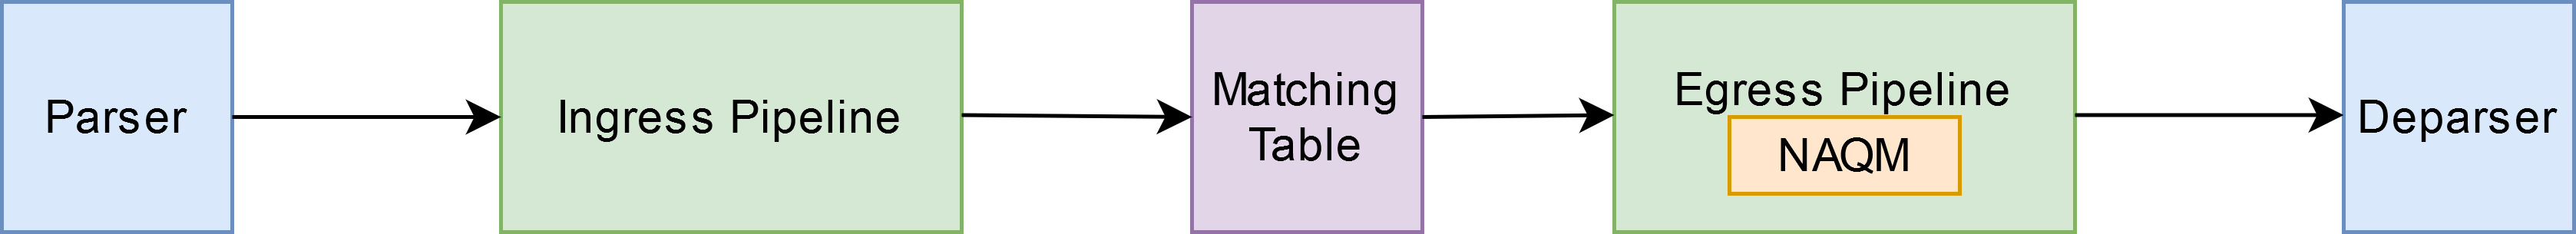

In [1]:
from IPython.display import Image

Image('../figures/1.jpg')

                   Figure 1: NAQM in V1 model

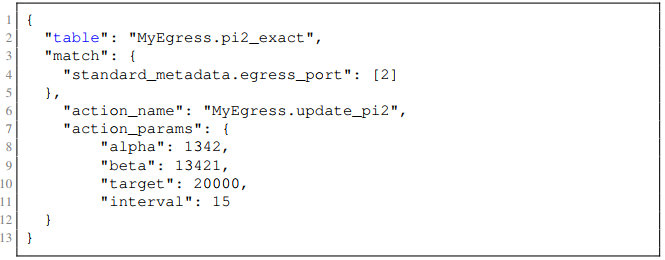

In [2]:
from IPython.display import Image

Image('../figures/paper.jpg')

                     Figure 2: PI_extact rule

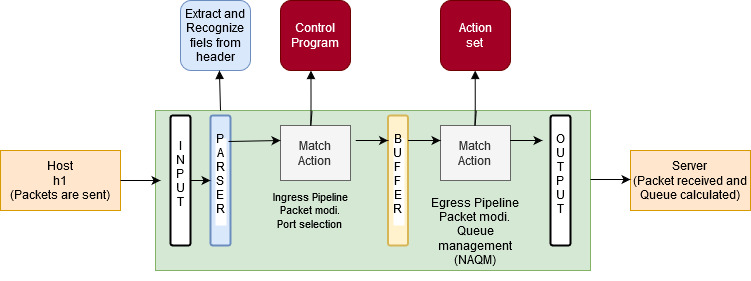

In [2]:
from IPython.display import Image

Image('../figures/flowchart.jpg')



                         Figure 3: P4 switch architecture and workflow

#### Discussion:
The current P4 abstraction model poses several challenges for implementing an NAQM scheme. The absence of floating point types required careful mapping into integer types, while the lack of support for complex arithmetic functions can be tackled
with the use of smart bit manipulations or external approximation functions supported by the hardware. Authors in [6] employed the P4 longest prefix match table feature to map approximations for the square root. Our implementation does not require such resources which otherwise would constrain the forwarding functionality.

## 5  [System Setup and Results](https://github.com/Meerkhan12/Reproducible-research)
In the current section we illustrate the functionality of our P4- programmable NAQM scheme using some simple test cases. Evaluation Environment: Our sytem setup consists of 3 machines with at least two 1Gbps interfaces as shown in Fig. 2. The configuration parameters for the PI2 NAQM algorithm are provided in Listing 1. We compare PI2 with a existing queue scheme that requires a buffer of 200 packets, assuming a reference link of 120Mbps and a delay target of 20ms. For the PI2 AQM we set the buffer size high enough (10,000 packets) to make sure that the only congestion control is performed by the AQM. The target delay can be modified without impacting other control parameters (we use 5ms and 20ms). The P4 switch can limit the rate of packets emitted from the egress pipeline, emulating different link capacities. We use this configuration option to set the rate limit. A base RTT is established by setting a 5ms delay on the interfaces of the client and server machines. A single greedy TCP flow is running and the network queuing delay is shown during its steady state phase over an interval of 250 sec (average values over 1 second intervals).
#### Perormance Evaluation:
In the current section we illustrate the functionality of our P4- programmable AQM scheme using some simple test cases.
#### Simulation Environment: 
Our simulation setup consists of 3 nodes with at least two 1Gbps interfaces as shown in Fig. 3. The configuration parameters for the PI2 AQM algorithm are provided in Listing 1. We compare PI2 with a existing queue that requires a
buffer of 200 packets, assuming a reference link of 20Mbps and a delay target of 20ms. For the PI2 AQM we set the buffer size high enough (10,000 packets) to make sure that the only congestion control is performed by the AQM. The target delay can be modified without impacting other control parameters (we use 5ms and 20ms). The P4 switch can limit the rate of packets emitted from the egress pipeline, emulating different link capacities. We use this configuration option to set the rate limit. A base RTT is established by setting a 5ms delay on the interfaces of the client and server machines. A single greedy TCP flow is running and the network queuing delay is shown during its steady state phase over an interval of 250 sec (average values over 1 second intervals).



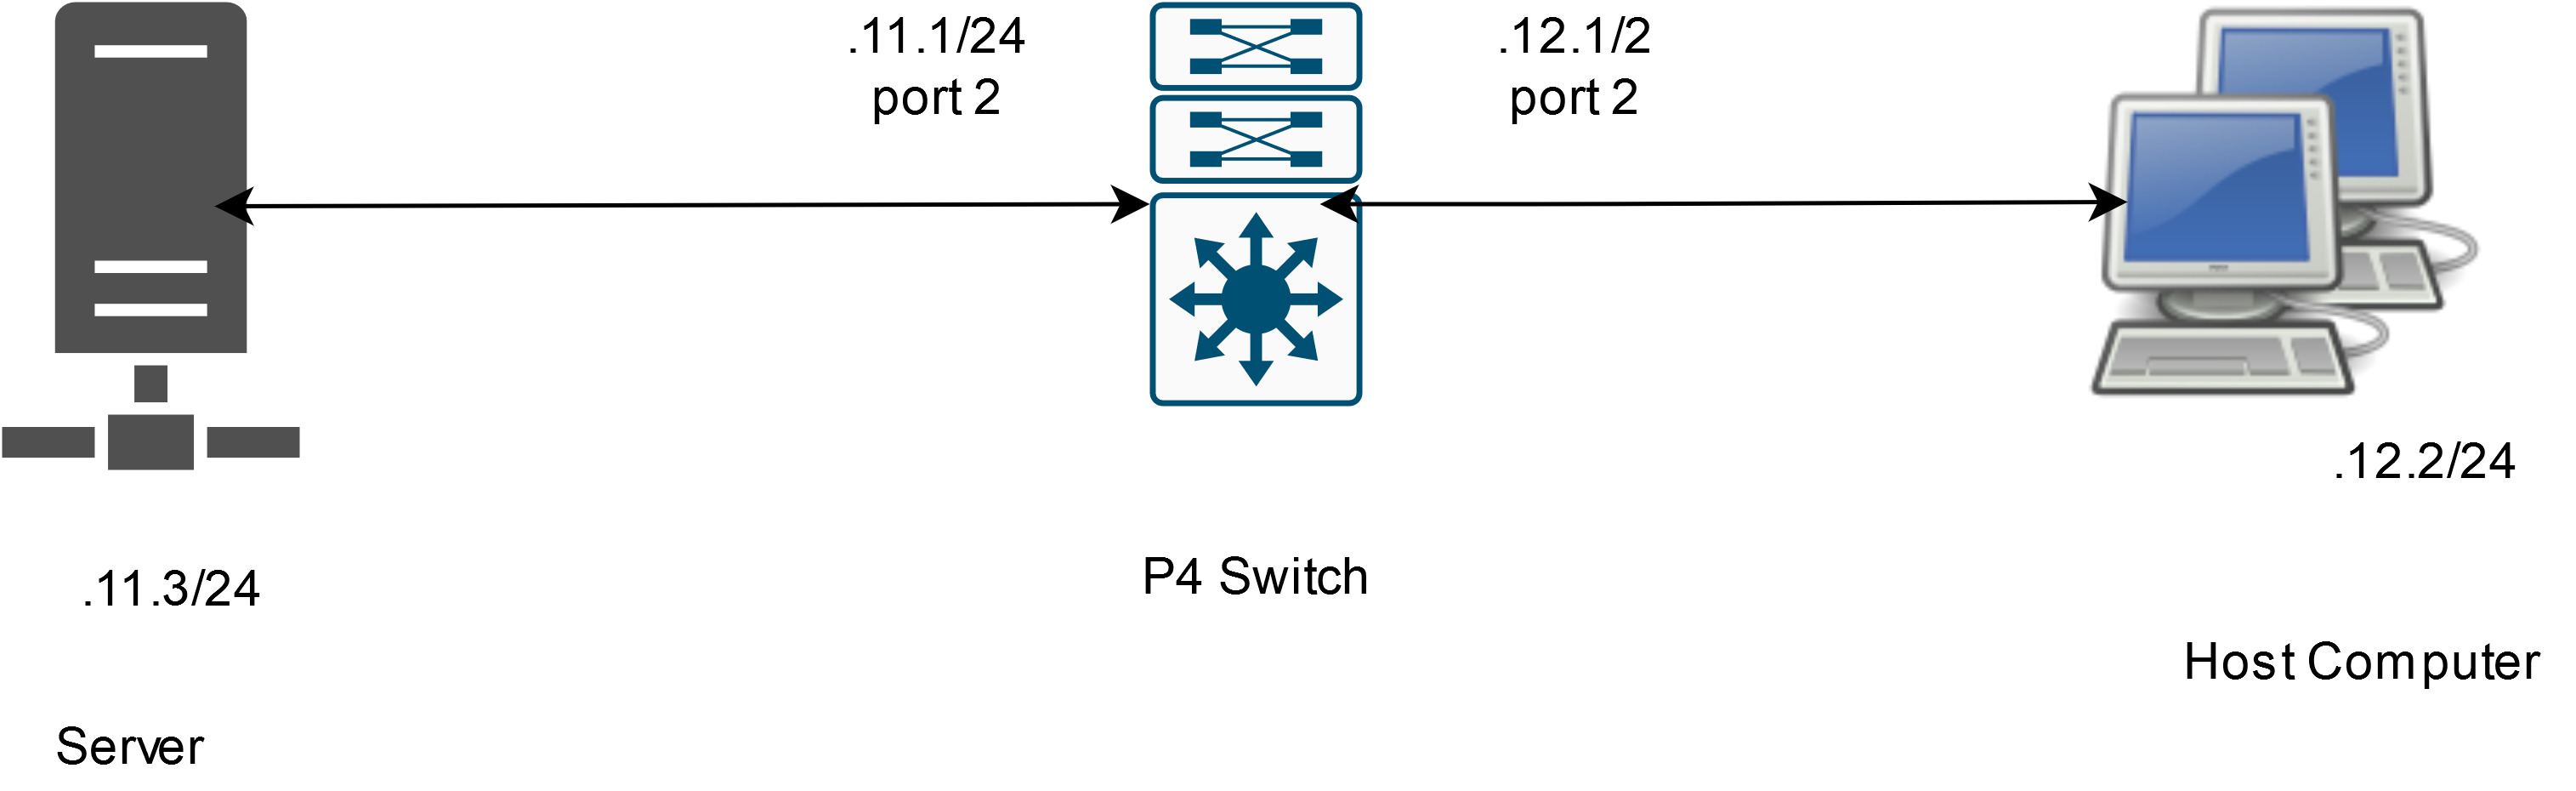

In [4]:
from IPython.display import Image

Image('../figures/2.jpg')

                                       Figure 4: System Setup

#### Results:
We verified our P4-PI2 implementation using an extensive set of tests to make sure it lines up with the results. However to demonstrate the effectiveness of the implementation, we present in Fig. 4 the queuing delay for the P4-PI2 NAQM, compared to the Existing scheme for varying network conditions. The initial bottleneck link capacity is set to 30Mbps. Fig. 4.(i) confirms as expected that a TD buffer size of 200 packets limits the delay to 20ms. It also shows that a PI2 AQM can easily be reconfigured by the controller with different delay targets (here 20ms and 5ms) via a simple update in the corresponding entry at the table. When the link capacity is reduced to 20Mbps as in the plot of Fig. 5 the queue will be served 10 times slower, resulting for the TD case in a 10 times higher delay (up to 200ms). The PI2 controller on the other hand, keeps the delay at the target levels. Moreover, there is no need to update the AQM settings when the throughput of the link changes. the number
of drop packets and number of delivered packets. All relevant code and information available on Github repository [13] to reproduce the work.

Figure 5: Queuing dealy with 30 mbp
---------------------------------------



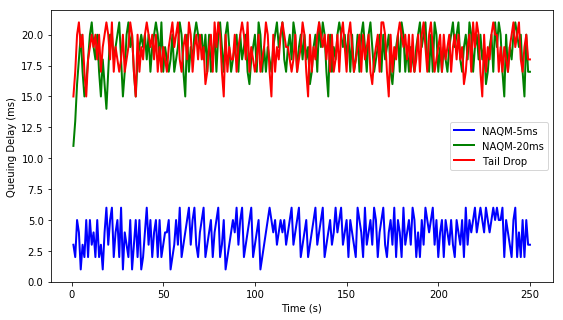


Figure 6: Queuing dealy with 10 mbp
---------------------------------------



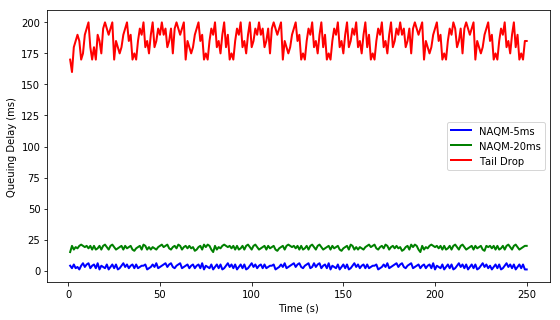

In [6]:
%run ../deliver/graph.ipynb

                  Figure 5: Queuing dealy with 30 mbps  Figure 6: Queuing dealy with 10 mbps 

## 5  Conclusion 

In this paper a novel queuing delay scheme is proposed and with the help experiments it can be seen in graphs that our proposed scheme gives the better results in term of queuing delay as compared to existing scheme in various network condition.

## Future Work
Network slicing is a great opportunity to further customize per-slice network behavior. Next to NAQMs, we believe additional perslice protocol customization and real-time network service interactions are required enablers to deal with future network challenges. This will require an agile and flexible programmable data-plane beyond the current forwarding and traffic management scope.

## REFERENCES
[1]Pat Bosshart, Dan Daly, Glen Gibb, Martin Izzard, Nick McKeown, Jennifer Rexford, Cole Schlesinger, Dan Talayco, Amin Vahdat,George Varghese, and David Walker. ”P4: Programming Protocolindependent Packet Processors,” SIGCOMM Computer Communication,pp.87–95,2014.
[2] Antonin Bas., ”The P4 behavioral model version 2.” 2019. [online]. Available: https://github.com/ p4lang/behavioral-model

[3] Koen De Schepper, Olga Bondarenko, Ing-Jyh Tsang, and Bob Briscoe.,”PI 2: A Linearized AQM for both Classic and Scalable TCP”, In Proceedings of the 12th International on Conference on emerging Networking EXperiments and Technologies. ACM,pp. 105–119, 2016.

[4] N. K. Sharma, M. Liu, K. Atreya, and A. Krishnamurthy, “Approximating fair queueing on reconfigurable switches,” in USENIX Symposium on Networked Systems Design and Implementation, 2018.

[5] C. Cascone, N. Bonelli, L. Bianchi, A. Capone, and B. Sanso, “Towards `approximate fair bandwidth sharing via dynamic priority queuing,” IEEE International Symposium on Local and Metropolitan Area Networks (LANMAN),pp. 1–6, 2017.

[6] A. Sivaraman, K. Winstein, S. Subramanian, and H. Balakrishnan, “Nosilver bullet: extending sdn to the data plane,” in Proceedings of the Twelfth ACM Workshop on Hot Topics in networks. ACM,pp. 19,2016.

[7] Ralf Kundel, Jeremias Blendin, Tobias Viernickel, Boris Koldehofe, and Ralf Steinmetz., ”P4-CoDel: Active Queue Management in Programmable Data Planes.”In Proceedings of the IEEE Conference on Network Functions Virtualization and Sofwtare Defined Networks., pp.27–29, 2017.

[8] Dimitris J Bertsimas and Leslie David Servi., ”Deducing queueing fromtransactional data: the queue inference engine”, in revisited.Operations Research40,3-supplement-2, pp.217–228, 2015.

[9] F. Schwarzkopf, S. Veith, and M. Menth, “Performance analysis of codel and pie for saturated tcp sources,” in IEEE International conference on Teletraffic Congress (ITC 28), vol. 1., pp. 175–183, 2016.

[10] Vladimir Gurevich for Barefoot Networks., ”Programmable Data Plane atTerabit Speeds” 2017. [online]. available: https://p4.org/assets/p4-d2-2017-programmable-data-plane-at-terabit-speeds.pdf.

[11] B. Vinnakota, “Netronome and p4: A brief history and a roadmap,” 2018. [online]. available: https://www.netronome.c/blog/ netronomeand-p4-a-brief-history-and-a-roadmap/

[12] K. Nichols, V. Jacobson, A. McGregor, and A. Iyengar, “Controlled Delay Active Queue Management,” Internet Engineering Task Force, Request for Comments 8289, 2018.

[13] Meer. M. khan, “reproducible project,” 2020. [Online]. Available:https://github.com/Meerkhan12/Reproducible-research